In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "puglia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,16,Puglia,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,16,Puglia,1,0,1,2,3,2,2,...,0.0,242.0,0.0,2.0,0.00,33.33,0.83,0.00,0.00,200.000
4,2020-02-29T17:00:00,16,Puglia,1,0,1,2,3,0,0,...,0.0,10.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-11-19T17:00:00,16,Puglia,1324,200,1524,26976,28500,886,1263,...,28.0,9386.0,7292.0,880.0,13.12,5.35,13.46,17.32,1.01,4.574
269,2020-11-20T17:00:00,16,Puglia,1408,202,1610,27824,29434,934,1456,...,16.0,10102.0,4728.0,848.0,12.55,5.47,14.41,30.80,1.00,5.109
270,2020-11-21T17:00:00,16,Puglia,1432,197,1629,28791,30420,986,1377,...,19.0,9803.0,5414.0,967.0,12.09,5.36,14.05,25.43,-2.48,4.678
271,2020-11-22T17:00:00,16,Puglia,1449,188,1637,29715,31352,932,1327,...,32.0,6677.0,4703.0,924.0,11.48,5.22,19.87,28.22,-4.57,4.362


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 980
Nuovi tamponi: 3869.0
Percentuale nuovi positivi/nuovi tamponi: 25.3 %
Nuovi guariti: 313.0
Nuovi deceduti: 40.0
Variazione positivi ricoverati con sintomi: 50.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: 574.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-24T17:00:00,16,Puglia,207,10,217,2046,2263,41,73,...,3.0,4123.0,2610.0,38.0,4.61,9.59,1.77,2.80,0.00,3.285
1,2020-09-25T17:00:00,16,Puglia,208,10,218,2091,2309,46,90,...,1.0,3299.0,2507.0,45.0,4.59,9.44,2.73,3.59,0.00,3.977
2,2020-09-26T17:00:00,16,Puglia,203,11,214,2123,2337,28,51,...,3.0,3514.0,2793.0,32.0,5.14,9.16,1.45,1.83,10.00,2.209
3,2020-09-27T17:00:00,16,Puglia,210,12,222,2182,2404,67,76,...,0.0,2683.0,1682.0,59.0,5.41,9.23,2.83,4.52,9.09,3.252
4,2020-09-28T17:00:00,16,Puglia,214,15,229,2190,2419,15,90,...,2.0,1456.0,1720.0,8.0,6.55,9.47,6.18,5.23,25.00,3.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-19T17:00:00,16,Puglia,1324,200,1524,26976,28500,886,1263,...,28.0,9386.0,7292.0,880.0,13.12,5.35,13.46,17.32,1.01,4.574
57,2020-11-20T17:00:00,16,Puglia,1408,202,1610,27824,29434,934,1456,...,16.0,10102.0,4728.0,848.0,12.55,5.47,14.41,30.80,1.00,5.109
58,2020-11-21T17:00:00,16,Puglia,1432,197,1629,28791,30420,986,1377,...,19.0,9803.0,5414.0,967.0,12.09,5.36,14.05,25.43,-2.48,4.678
59,2020-11-22T17:00:00,16,Puglia,1449,188,1637,29715,31352,932,1327,...,32.0,6677.0,4703.0,924.0,11.48,5.22,19.87,28.22,-4.57,4.362


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

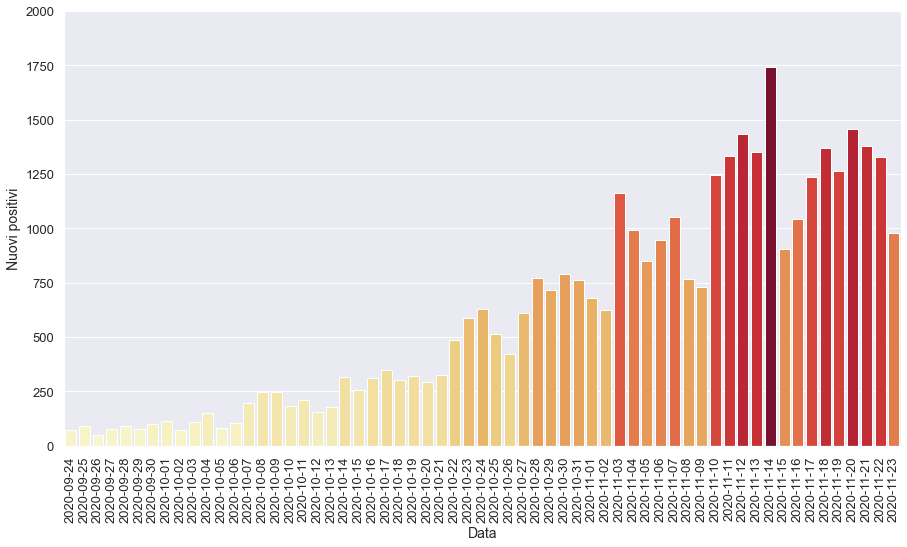

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

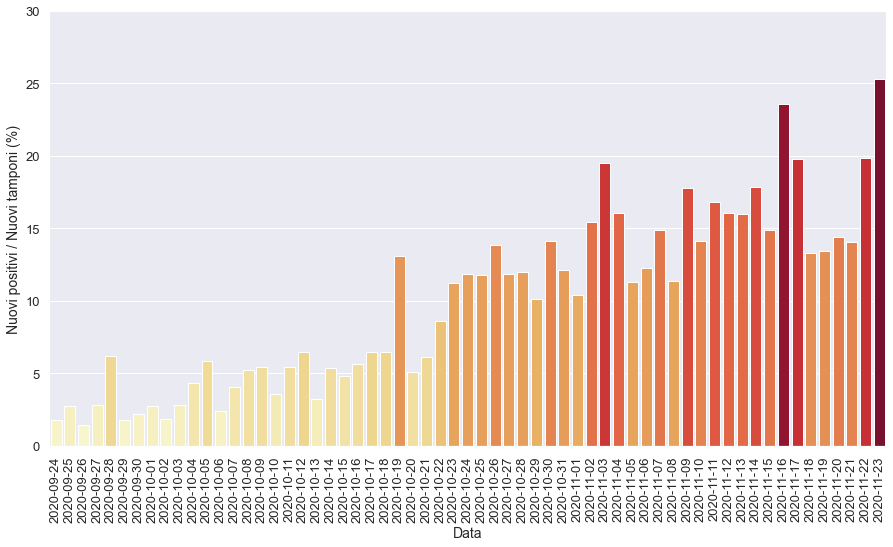

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

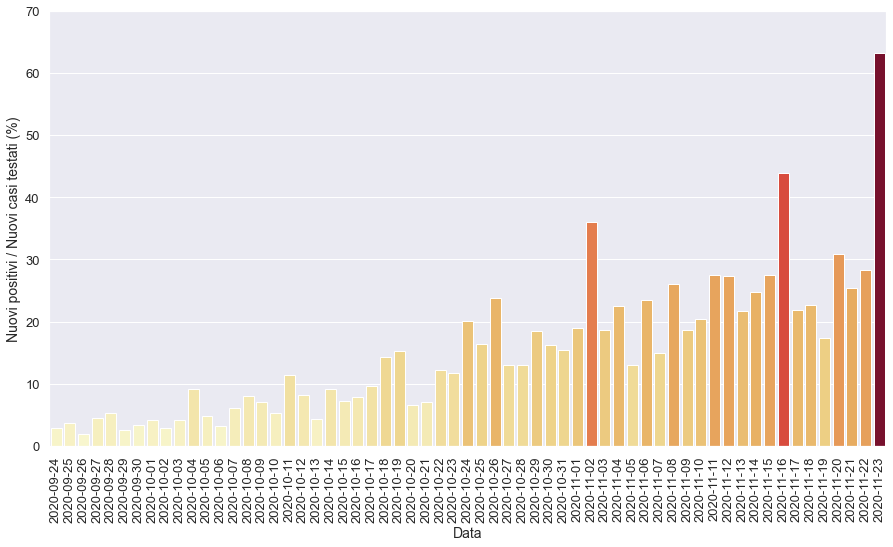

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

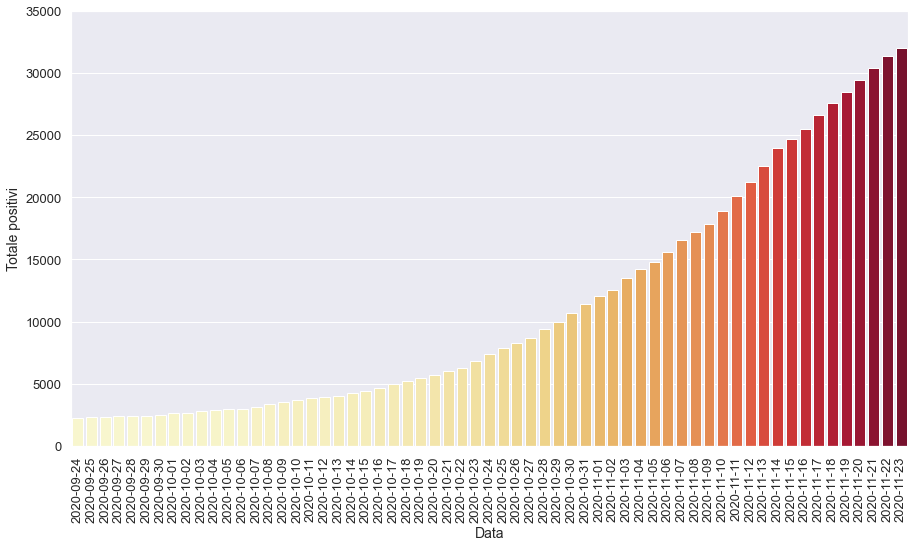

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

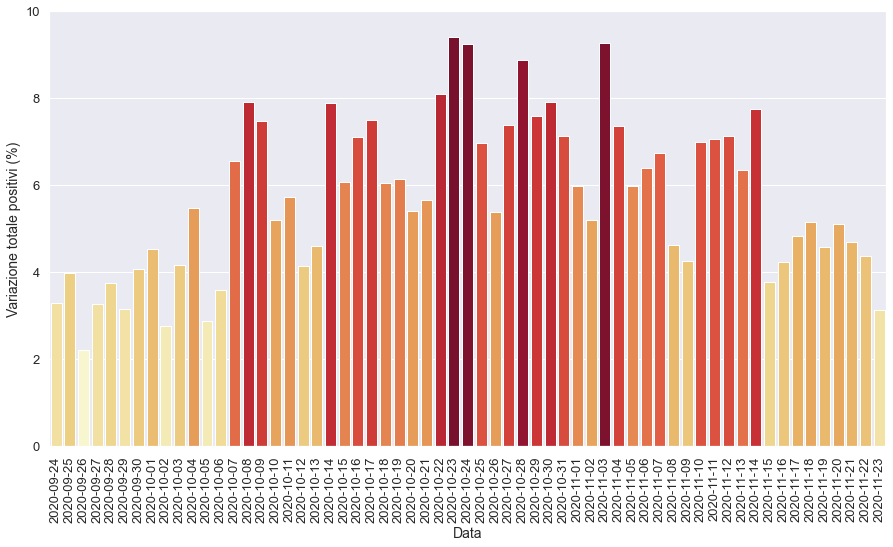

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

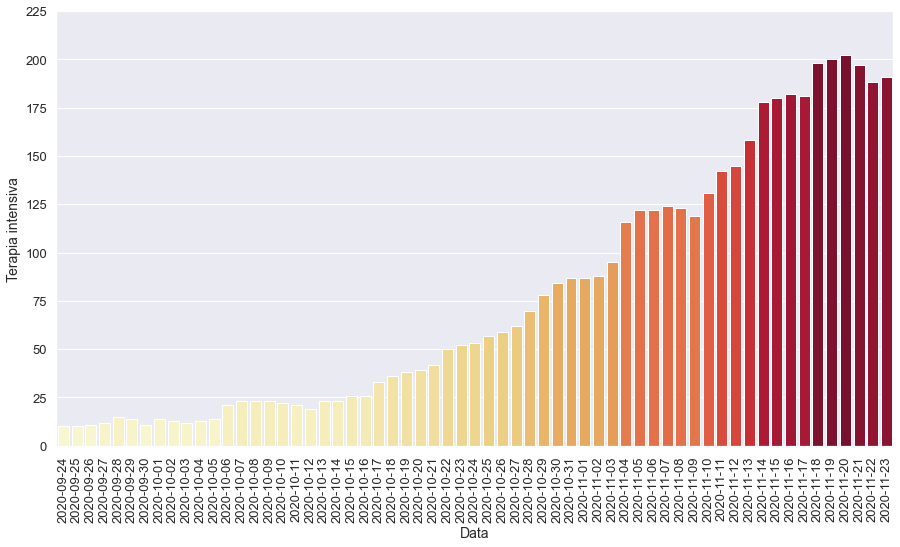

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

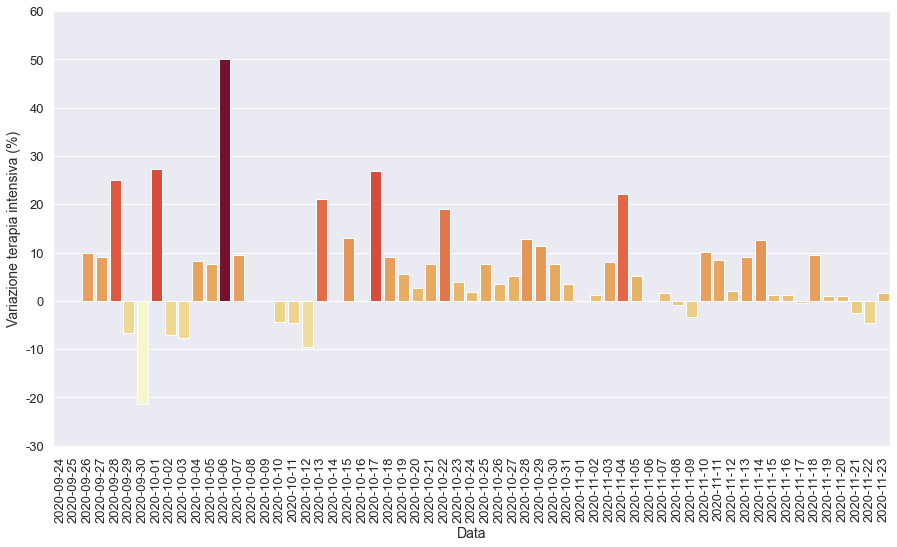

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

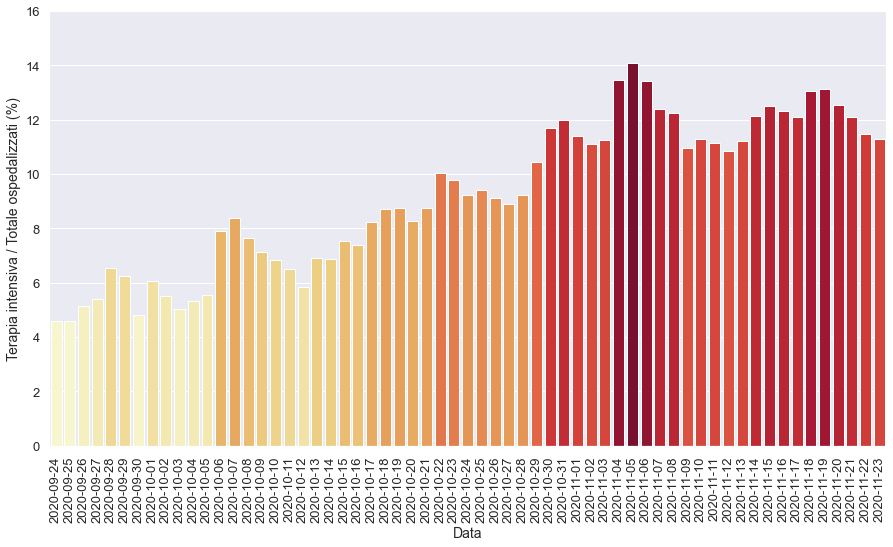

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

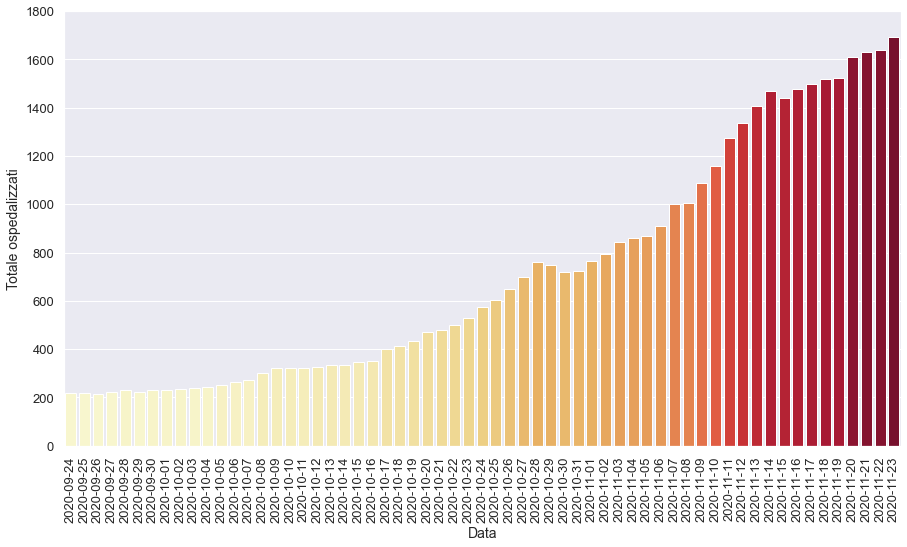

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

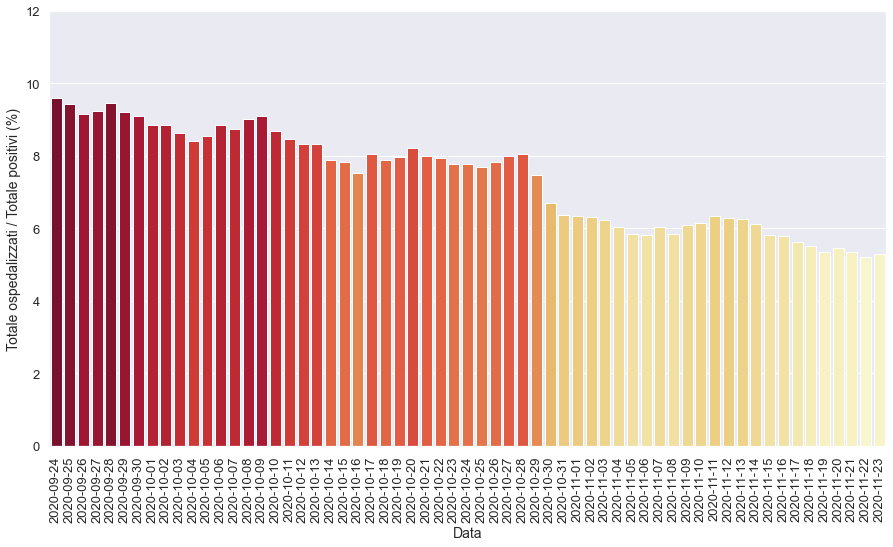

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

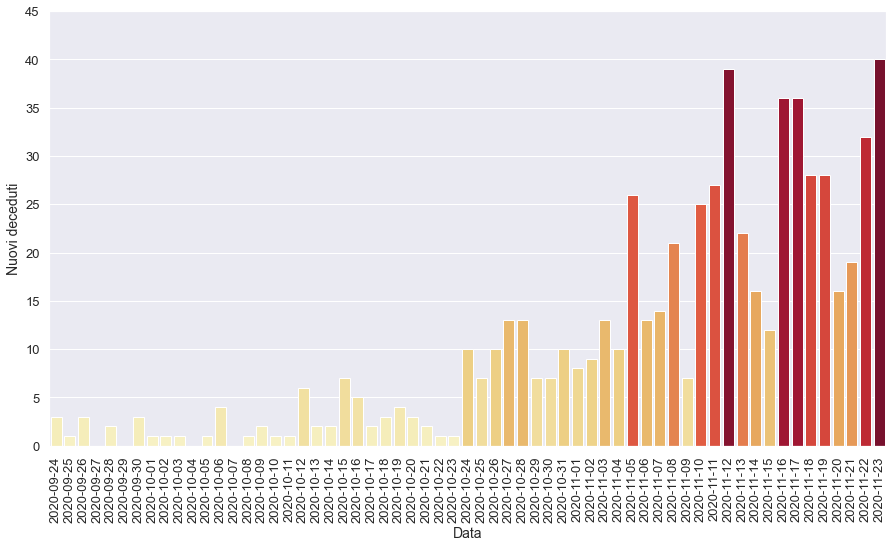

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

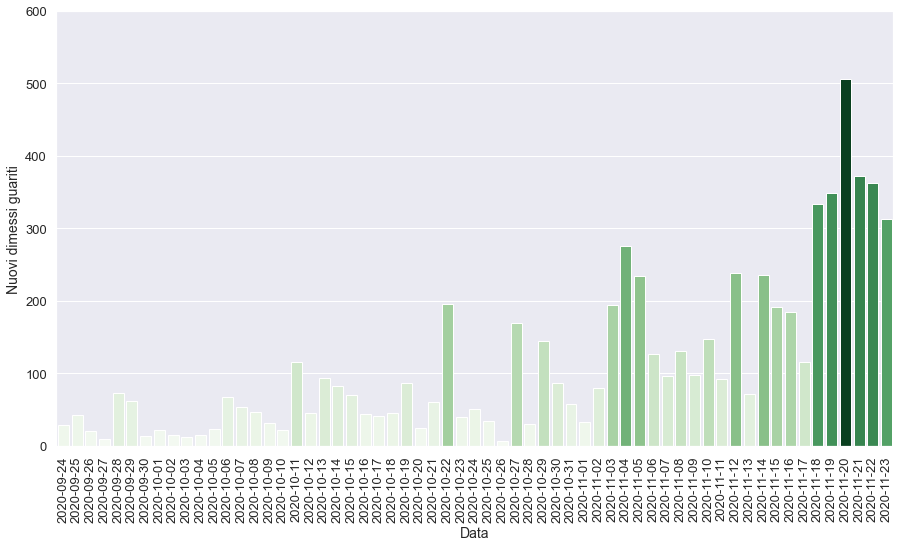

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-24T17:00:00,16,Puglia,522,53,575,6823,7398,570,631,...,10.0,5339.0,3140.0,526.0,9.22,7.77,11.82,20.10,1.92,9.241
1,2020-10-25T17:00:00,16,Puglia,548,57,605,7267,7872,474,515,...,7.0,4377.0,3151.0,444.0,9.42,7.69,11.77,16.34,7.55,6.961
2,2020-10-26T17:00:00,16,Puglia,589,59,648,7631,8279,407,424,...,10.0,3057.0,1786.0,364.0,9.10,7.83,13.87,23.74,3.51,5.386
3,2020-10-27T17:00:00,16,Puglia,635,62,697,8011,8708,429,611,...,13.0,5147.0,4727.0,380.0,8.90,8.00,11.87,12.93,5.08,7.380
4,2020-10-28T17:00:00,16,Puglia,690,70,760,8677,9437,729,772,...,13.0,6437.0,5934.0,666.0,9.21,8.05,11.99,13.01,12.90,8.865
5,2020-10-29T17:00:00,16,Puglia,669,78,747,9255,10002,565,716,...,7.0,7083.0,3866.0,578.0,10.44,7.47,10.11,18.52,11.43,7.587
6,2020-10-30T17:00:00,16,Puglia,634,84,718,9981,10699,697,791,...,7.0,5591.0,4891.0,726.0,11.70,6.71,14.15,16.17,7.69,7.908
7,2020-10-31T17:00:00,16,Puglia,638,87,725,10668,11393,694,762,...,10.0,6279.0,4922.0,687.0,12.00,6.36,12.14,15.48,3.57,7.122
8,2020-11-01T17:00:00,16,Puglia,677,87,764,11268,12032,639,680,...,8.0,6533.0,3598.0,600.0,11.39,6.35,10.41,18.90,0.00,5.969
9,2020-11-02T17:00:00,16,Puglia,705,88,793,11776,12569,537,626,...,9.0,4060.0,1737.0,508.0,11.10,6.31,15.42,36.04,1.15,5.203


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

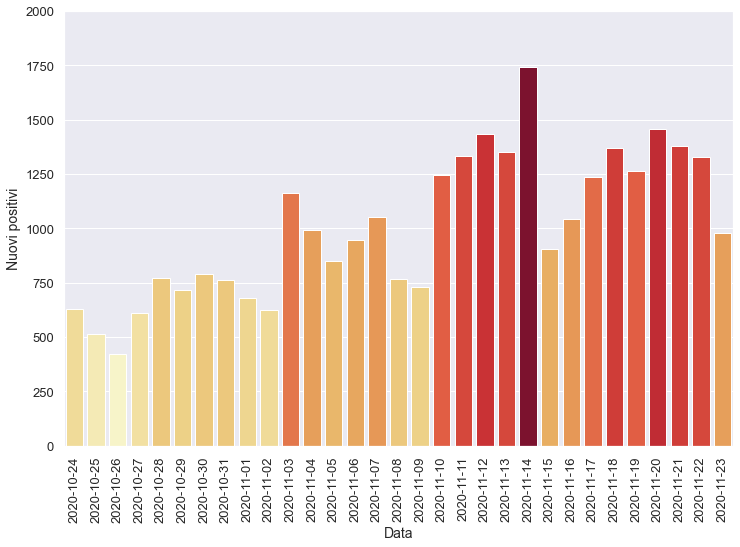

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

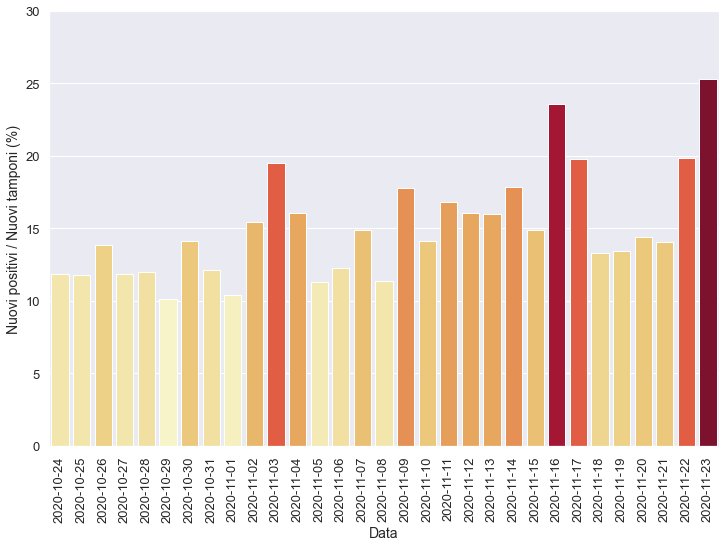

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

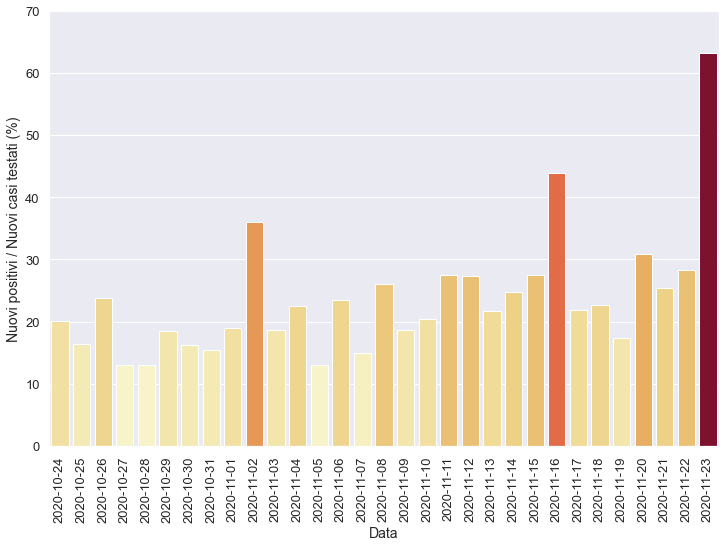

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

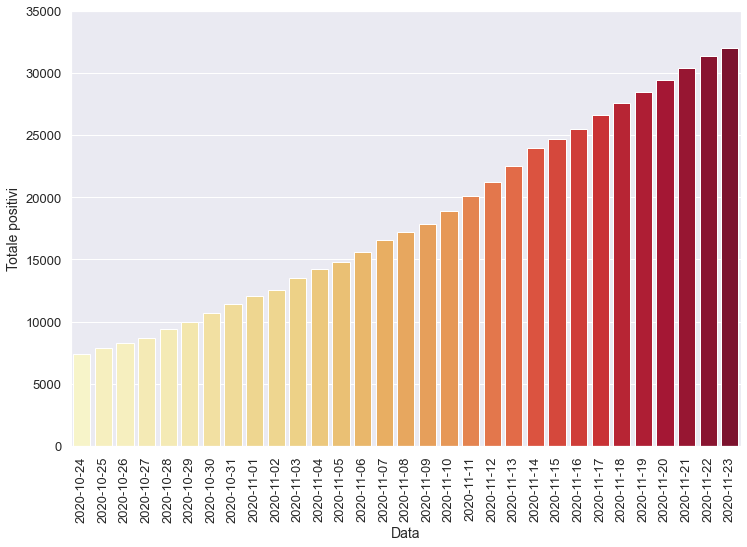

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

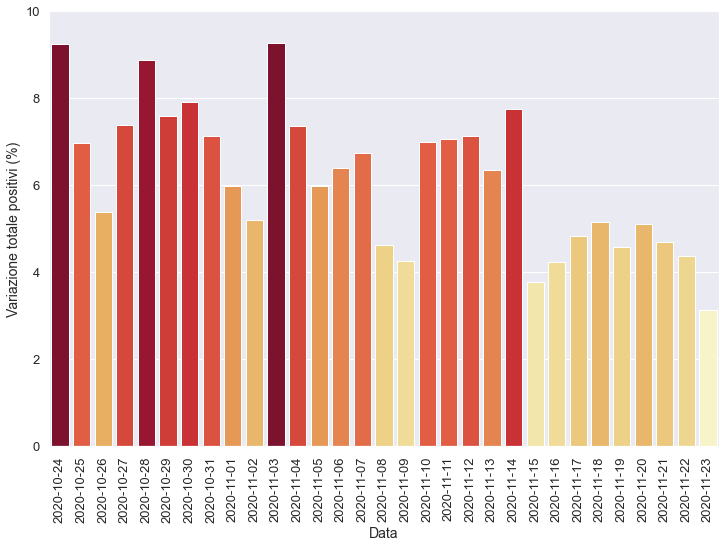

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

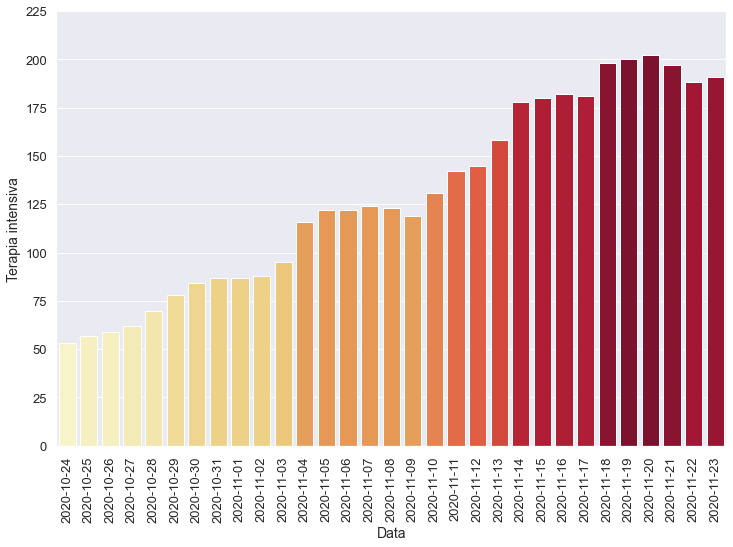

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

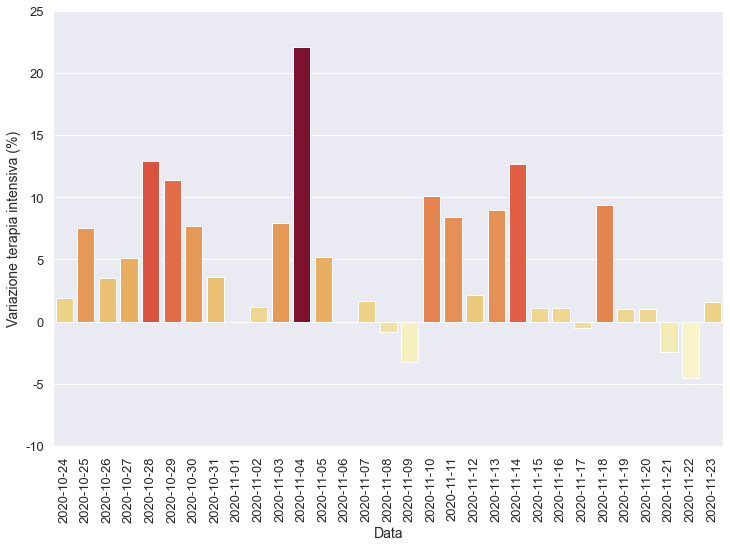

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

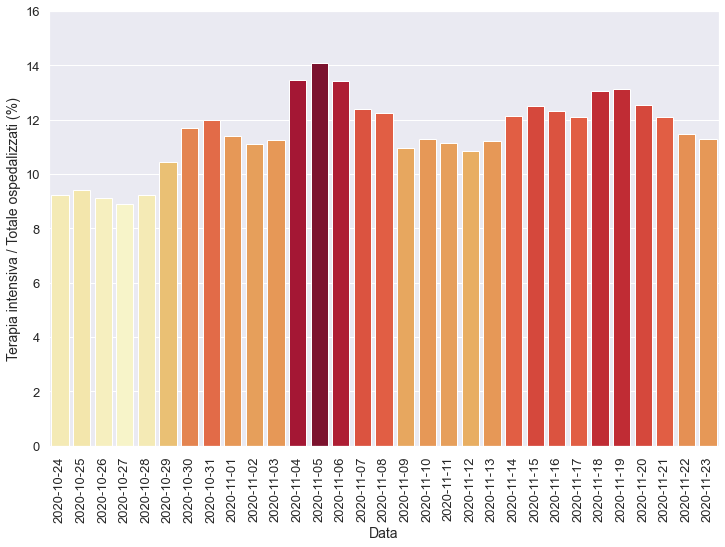

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

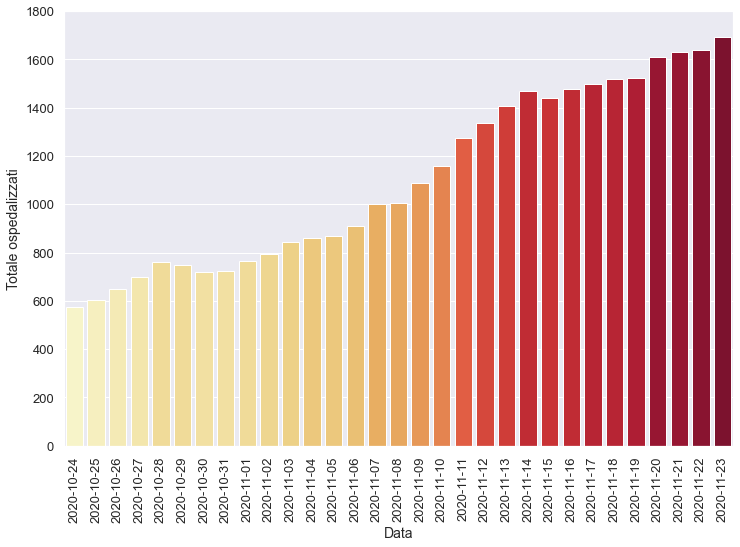

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

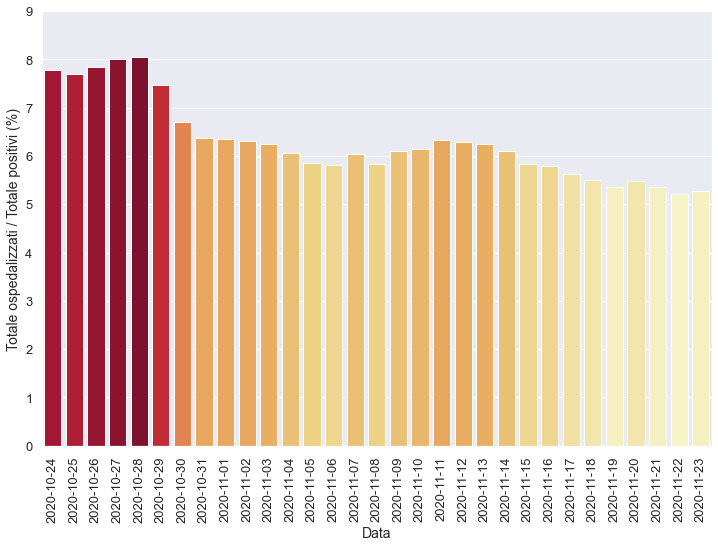

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

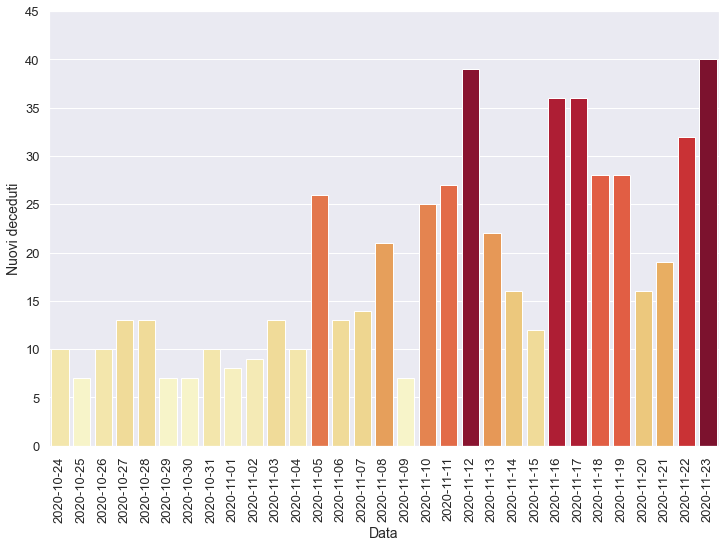

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

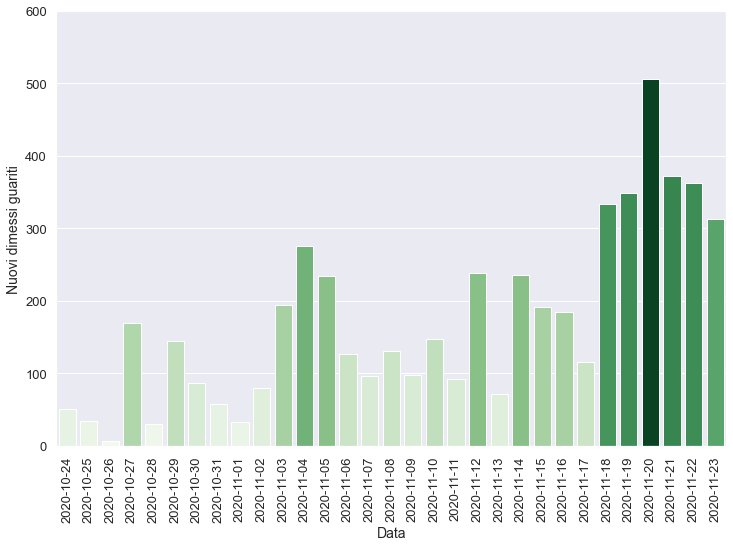

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,4.226
1,2020-11-17T17:00:00,16,Puglia,1316,181,1497,25110,26607,1082,1234,...,36.0,6228.0,5638.0,1062.0,12.09,5.63,19.81,21.89,-0.55,4.834
2,2020-11-18T17:00:00,16,Puglia,1320,198,1518,26096,27614,1007,1368,...,28.0,10265.0,6047.0,986.0,13.04,5.50,13.33,22.62,9.39,5.142
3,2020-11-19T17:00:00,16,Puglia,1324,200,1524,26976,28500,886,1263,...,28.0,9386.0,7292.0,880.0,13.12,5.35,13.46,17.32,1.01,4.574
4,2020-11-20T17:00:00,16,Puglia,1408,202,1610,27824,29434,934,1456,...,16.0,10102.0,4728.0,848.0,12.55,5.47,14.41,30.80,1.00,5.109
5,2020-11-21T17:00:00,16,Puglia,1432,197,1629,28791,30420,986,1377,...,19.0,9803.0,5414.0,967.0,12.09,5.36,14.05,25.43,-2.48,4.678
6,2020-11-22T17:00:00,16,Puglia,1449,188,1637,29715,31352,932,1327,...,32.0,6677.0,4703.0,924.0,11.48,5.22,19.87,28.22,-4.57,4.362
7,2020-11-23T17:00:00,16,Puglia,1499,191,1690,30289,31979,627,980,...,40.0,3869.0,1550.0,574.0,11.30,5.28,25.33,63.23,1.60,3.126


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

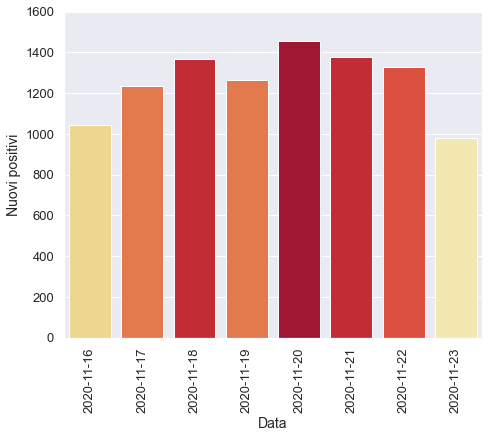

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

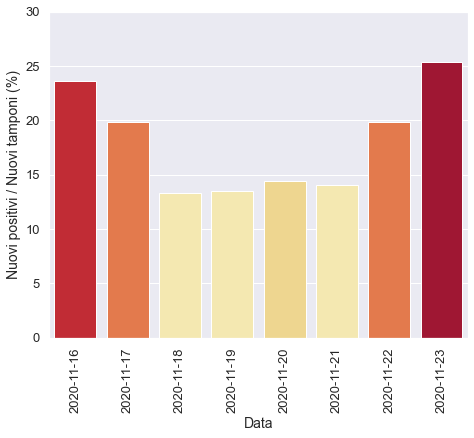

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

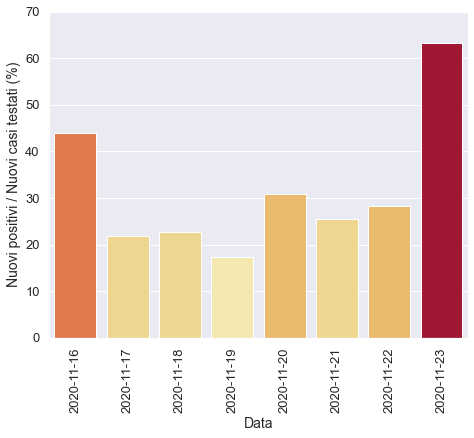

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

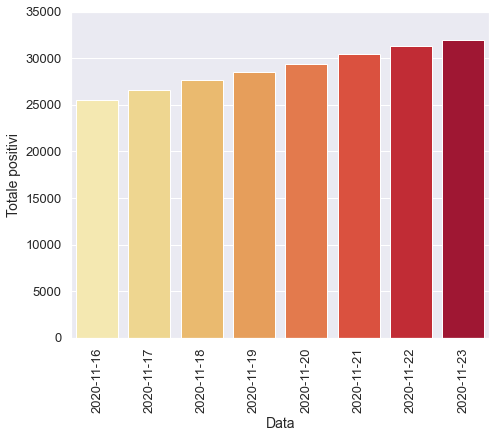

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

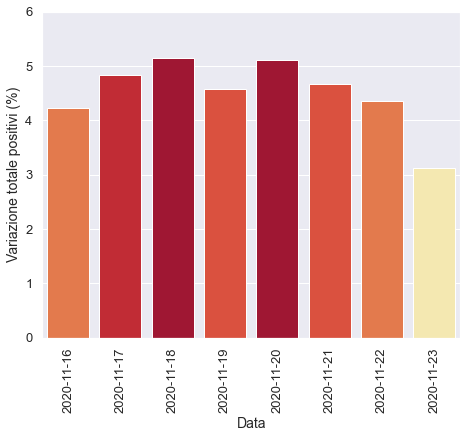

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

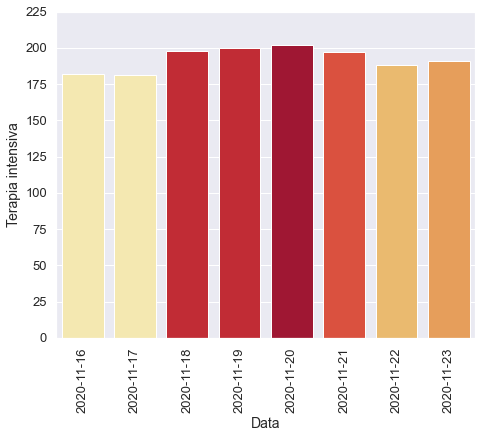

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

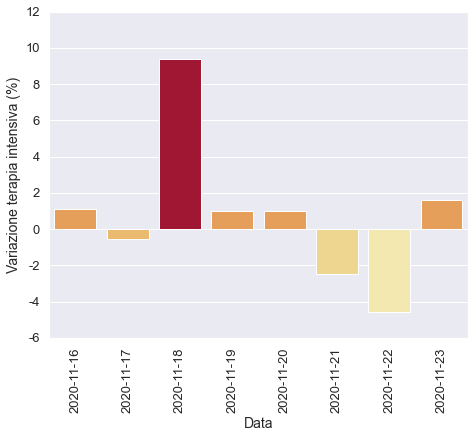

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

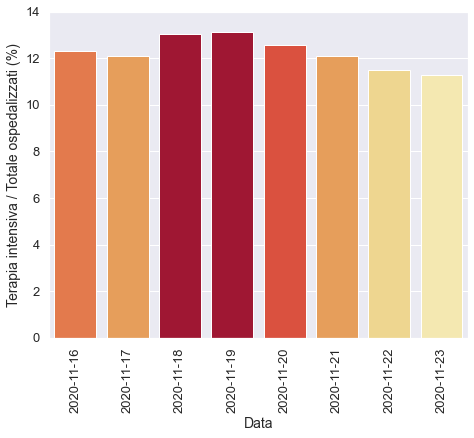

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

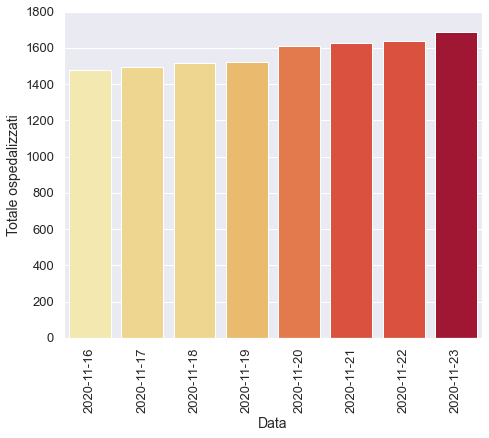

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

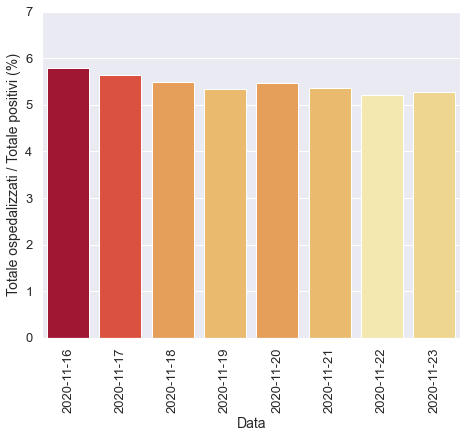

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

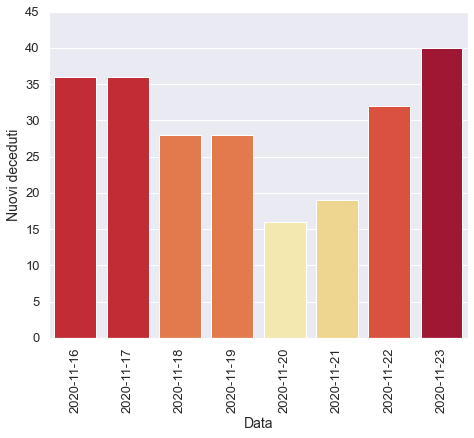

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

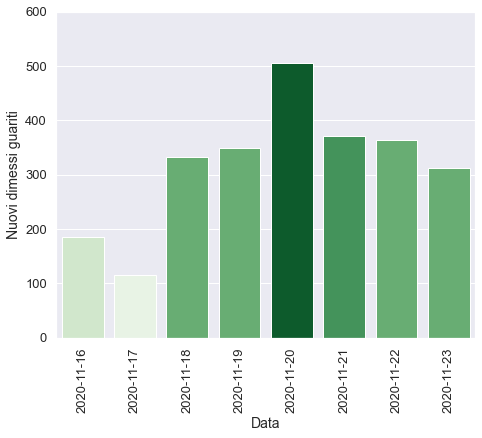

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)